In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [216]:
def logistregr(X,T,itr):
    w0=1;lr=.1
    k=X.shape[1] 
    w=np.zeros(k)     #random initialize weights
    for i in range(itr):
        z=w0+np.dot(X,w)
        p=1 / (1 + np.exp(-z))
    if(p>.5):
        return 1
    else:
        return 0
    

In [281]:
#given
X=np.array([[1,2,4,5]])
y=np.array([[0,0,1,1]])
incpt=np.array([[1,1,1,1]])
X_new=np.concatenate((incpt, X), axis=0)
w=np.array([[1],[1]])
for i in range(100):
    z=np.dot(w.T,X_new)
    p=1 / (1 + np.exp(-z))
    dw=np.dot(X_new,(p-y).T)
    w=w-.1*(dw)
    p=p>.5
    P=p.astype(int)
    print('itera=',i,' ',w,'   ', 'Prediction =',P)
Pr=P

itera= 0   [[0.81757943]
 [0.72531892]]     Prediction = [[1 1 1 1]]
itera= 1   [[0.64809957]
 [0.4769683 ]]     Prediction = [[1 1 1 1]]
itera= 2   [[0.50117513]
 [0.28680534]]     Prediction = [[1 1 1 1]]
itera= 3   [[0.38663495]
 [0.19658267]]     Prediction = [[1 1 1 1]]
itera= 4   [[0.29779172]
 [0.19114867]]     Prediction = [[1 1 1 1]]
itera= 5   [[0.21732443]
 [0.21019715]]     Prediction = [[1 1 1 1]]
itera= 6   [[0.13909419]
 [0.23166288]]     Prediction = [[1 1 1 1]]
itera= 7   [[0.06239047]
 [0.25304266]]     Prediction = [[1 1 1 1]]
itera= 8   [[-0.01286249]
 [ 0.27413196]]     Prediction = [[1 1 1 1]]
itera= 9   [[-0.08669037]
 [ 0.29491319]]     Prediction = [[1 1 1 1]]
itera= 10   [[-0.15911602]
 [ 0.31538505]]     Prediction = [[1 1 1 1]]
itera= 11   [[-0.23016321]
 [ 0.33554823]]     Prediction = [[1 1 1 1]]
itera= 12   [[-0.29985681]
 [ 0.35540414]]     Prediction = [[1 1 1 1]]
itera= 13   [[-0.36822262]
 [ 0.37495471]]     Prediction = [[1 1 1 1]]
itera= 14   [[-0.4

**MODEL after 100 Iterations**
# z=-3.5609+1.3461
## Y_hat= 1/(1+e^-z)

In [205]:
Pr=[0 ,0 ,1, 1]  #predcited class after 100 inetartions
Tr=[0 ,0 ,1, 1]

In [196]:
from sklearn.metrics import  confusion_matrix

In [207]:
mat=confusion_matrix(Tr,Pr)
mat

array([[2, 0],
       [0, 2]], dtype=int64)

In [209]:
tn, fp, fn, tp=confusion_matrix(Tr,Pr).ravel()
(tn, fp, fn, tp)

(2, 0, 0, 2)

In [212]:

def accuracy_measure(TN, FP, FN, TP,total):
    print('accuracy =',' ',(TP+TN)/total)
    print('True Positive Rate =',' ', TP/(FN+TP))
    print('False Positive Rate =',' ', FP/(FP+TN))
    print('True Negative Rate =',' ', TN/(FP+TN))
    print('Precision =',' ',TP/(TP+FP))

In [213]:
total=tn+fp+fn+tp
(TN,FP,FN,TP)=(tn, fp, fn, tp)
accuracy_measure(TN, FP, FN, TP,total)

accuracy =   1.0
True Positive Rate =   1.0
False Positive Rate =   0.0
True Negative Rate =   1.0
Precision =   1.0


In [280]:
z=-3.5609+1.3461*X
p=1 / (1 + np.exp(-z))
trs=np.arange(.1,1,.1).tolist()
TPR=[]
FPR=[]
for tr in trs:
    
    P=(p>tr).astype(int)
    Pr=P[0,:].tolist()
    
   
    tn, fp, fn, tp=confusion_matrix(Tr,Pr).ravel()
    TPR.append(tp/(fn+tp))
    FPR.append(fp/(fp+tn))
print('TPR =',TPR) 
print('FPR =',FPR) 
f={'Thresold':trs,'TPRs':TPR,'FPRs':FPR}
df=pd.DataFrame(f)
df


TPR = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]
FPR = [0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


,Thresold,TPRs,FPRs
0,0.1,1.0,0.5
1,0.2,1.0,0.5
2,0.3,1.0,0.0
3,0.4,1.0,0.0
4,0.5,1.0,0.0
5,0.6,1.0,0.0
6,0.7,1.0,0.0
7,0.8,1.0,0.0
8,0.9,0.5,0.0


In [266]:
import matplotlib.pyplot as plt

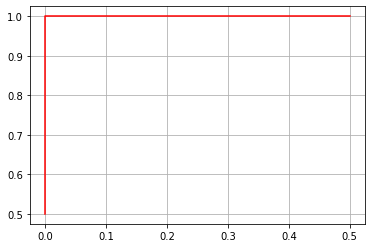

In [275]:
plt.plot(FPR,TPR,'r')
plt.grid()
plt.title('ROC Curve')


In [287]:
df=pd.read_csv('logistic-regression-binary.csv')
df.sample(5)

,x,y,yclass
328,-12.275454,14.538973,1
50,-17.394735,16.922750,1
602,25.877293,6.553476,2
347,-14.735605,37.106748,1
401,10.513161,31.784154,2


In [307]:
df.groupby('yclass').count()

,x,y
yclass,,
1,360,360
2,360,360


In [308]:
df['yclass'].value_counts()

2    360
1    360
Name: yclass, dtype: int64

In [349]:
df['yclass']=df['yclass'].replace(2,0)
df['yclass'].unique()

array([1, 0], dtype=int64)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
x         720 non-null float64
y         720 non-null float64
yclass    720 non-null int64
dtypes: float64(2), int64(1)
memory usage: 17.0 KB


In [351]:
df.isnull().any()

x         False
y         False
yclass    False
dtype: bool

In [352]:
df.describe()

,x,y,yclass
count,720.000000,720.000000,720.000000
mean,-2.701315,19.854921,0.500000
std,20.700033,10.734394,0.500348
min,-52.736097,-34.044923,0.000000
25%,-21.269614,12.860790,0.000000
50%,-2.108764,19.717656,0.500000
75%,13.891912,27.513233,1.000000
max,48.502301,51.073358,1.000000


In [353]:
df['yclass'].describe()

count    720.000000
mean       0.500000
std        0.500348
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yclass, dtype: float64

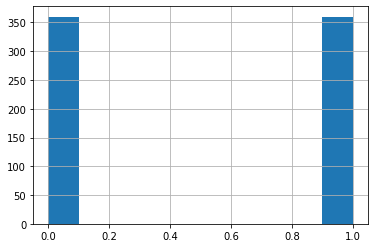

In [354]:
df['yclass'].hist()

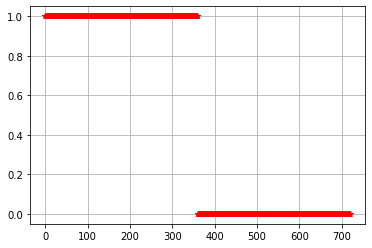

In [355]:
plt.plot(df['yclass'],'r*')
plt.grid()

In [382]:
from sklearn.linear_model import LogisticRegression
X=df.iloc[:,[0,1]]
y=df.iloc[:,2]

In [383]:
model=LogisticRegression()

In [384]:
model.fit(X,y)

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [391]:
pred=model.predict(X)


In [389]:
confusion_matrix = confusion_matrix(y, pred)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [366]:
from sklearn.metrics import classification_report
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       360
           1       0.96      0.96      0.96       360

    accuracy                           0.96       720
   macro avg       0.96      0.96      0.96       720
weighted avg       0.96      0.96      0.96       720



In [368]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, pred)
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])

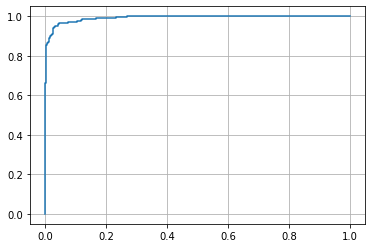

In [370]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.grid()

Comment:High accuracy is there